## Observations and Insights (by Marisa Duong 25/10/2022)

1. Smallest average tumour volumes (also with lowest variance) seemed to be found for the Capomulin and Ramicane regimens.
However, these 2 drug regimens are also noted with higher numbers of time points than other regimens, so average tumour volume values may be biased.
2. Male and female mice were fairly chosen (around 50% each sex)
3. Tumour volume is correlated with mouse weight, at least for the Capomulin regimen.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df1=pd.merge(mouse_metadata,study_results,on="Mouse ID")

# Display the data table for preview
df1.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
df1["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicatemice = df1[df1.duplicated(['Mouse ID','Timepoint'])]
# duplicatemice.groupby("Mouse ID").count()


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicatemice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df2=df1.drop_duplicates(subset=["Mouse ID","Timepoint"])

In [6]:
# Checking the number of mice in the clean DataFrame.
df2["Mouse ID"].nunique()
##Note: The same as non-clean Dataframe (df1) because only the duplicate mouse was dropped

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 
# Assemble the resulting series into a single summary dataframe.

df3=df2.groupby('Drug Regimen')['Tumour Volume (mm3)'].describe()
df_summary_per_regimen=pd.DataFrame(df3[['mean','50%']])
df_summary_per_regimen['variance']=df3['std']**2
df_summary_per_regimen['standard deviation']=df3['std']
df_summary_per_regimen['SEM']=df3['std']/df3['count']
df_summary_per_regimen.rename(columns={'50%':'median'})

,mean,median,variance,standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.021716
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.035215
Infubinol,52.884795,51.820584,43.128684,6.567243,0.036895
Ketapril,55.235638,53.698743,68.553577,8.279709,0.044041
Naftisol,54.331565,52.509285,66.173479,8.134708,0.043735
Placebo,54.033581,52.288934,61.168083,7.821003,0.043210
Propriva,52.393463,50.909965,43.138803,6.568014,0.042103
Ramicane,40.216745,40.673236,23.486704,4.846308,0.021256
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.042599


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
df_summary_method_aggregate=df2.groupby('Drug Regimen')['Tumour Volume (mm3)'].aggregate(['mean','median','var','std','sem'])
df_summary_method_aggregate

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

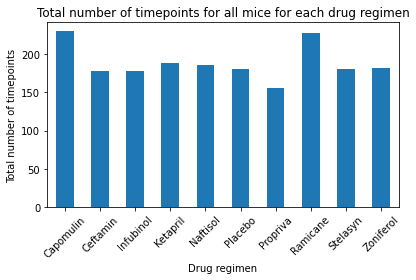

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
df4=df2.groupby('Drug Regimen')['Timepoint'].count()
dfplot=df4.plot(kind="bar", title="Total number of timepoints for all mice for each drug regimen",rot=45)
dfplot.set_ylabel("Total number of timepoints")
dfplot.set_xlabel("Drug regimen")
plt.tight_layout()
plt.savefig("./figures/Bar plot timepoints vs drug regimen_Pandas.png")
plt.show()

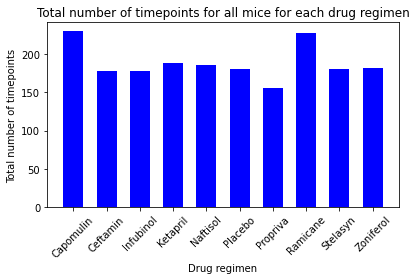

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis=df4.index
plt.bar(x_axis,df4,width=0.6,color="b", align="center")
plt.title("Total number of timepoints for all mice for each drug regimen")
plt.ylabel("Total number of timepoints")
plt.xlabel("Drug regimen")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("./figures/Bar plot timepoints vs drug regimen_Pyplot.png")
plt.show()

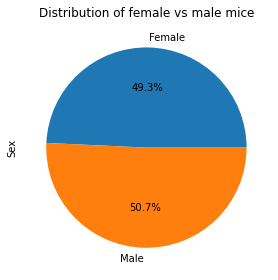

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
df_sex=df2.groupby('Sex')['Sex'].count()
df_sex.plot.pie(y="Sex",title="Distribution of female vs male mice", autopct='%1.1f%%')
plt.tight_layout()
plt.savefig("./figures/PiePlot_sex distribution_Pandas.png")
plt.show()

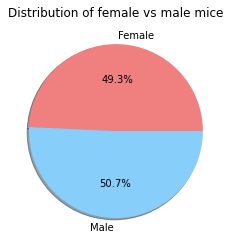

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
# The values of each section of the pie chart
sizes = df_sex
# The colours of each section of the pie chart
colours = ["lightcoral", "lightskyblue"]
explode = (0,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colours,
        autopct="%1.1f%%", shadow=True)
plt.title("Distribution of female vs male mice")
plt.savefig("./figures/PiePlot_sex distribution_Pyplot.png")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumour volume at the last timepoint

##Checked if max timepoints were different across different drug regimen: 
df5=df2.groupby('Drug Regimen')['Timepoint'].max()
df5
###Conclude: all drug regimen had the same max time points.
    
maxtimepoint=max(df2['Timepoint'])
maxtimepoint

df_filter4drugs=df2.loc[(df2['Drug Regimen']=='Capomulin')|(df2['Drug Regimen']=='Ramicane')|
                        (df2['Drug Regimen']=='Infubinol')|(df2['Drug Regimen']=='Ceftamin'),:]
df_filter4drugs_Maxtime=df_filter4drugs.loc[df_filter4drugs['Timepoint']==maxtimepoint]
df_filter4drugs_Maxtime

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1813,y163,Infubinol,Female,17,27,45,67.685569,3
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3


Values below -9.513252184999999 could be outliers.
Values above 105.135493215 could be outliers.
Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumour Volume (mm3), Metastatic Sites]
Index: []
Empty data frame means no outliers.


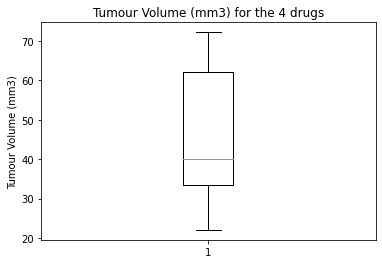

There is no visible outlier.
CONCLUSION: Both methods show no outliers when considering tumour volumes for all 4 drugs combined.


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=[x for x in df_filter4drugs_Maxtime['Drug Regimen']]
# Create empty list to fill with tumour vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumour volumes
# add subset   
# Determine outliers using upper and lower bounds
quartiles=df_filter4drugs_Maxtime['Tumour Volume (mm3)'].quantile([.25,.5,.75])
lowerq=quartiles[.25]
upperq=quartiles[0.75]
iqr=upperq - lowerq
lower_bound=lowerq - (1.5*iqr)
upper_bound=upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
outliers_df=df_filter4drugs_Maxtime.loc[(df_filter4drugs_Maxtime['Tumour Volume (mm3)']<lower_bound)|
                                        (df_filter4drugs_Maxtime['Tumour Volume (mm3)']>upper_bound),:]
print(outliers_df)
print('Empty data frame means no outliers.')

fig1, ax1 = plt.subplots()
ax1.set_title('Tumour Volume (mm3) for the 4 drugs')
ax1.set_ylabel('Tumour Volume (mm3)')
ax1.boxplot(df_filter4drugs_Maxtime['Tumour Volume (mm3)'])
plt.show()
print('There is no visible outlier.')
print('CONCLUSION: Both methods show no outliers when considering tumour volumes for all 4 drugs combined.')

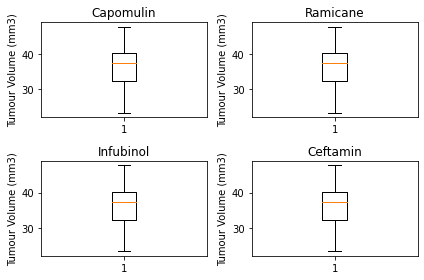

CONCLUSION: No outliers for tumour volumes when considering each drug one by one.


In [15]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest
a=0
b=0
fig2, ax1 = plt.subplots(2,2)
for drug in ['Capomulin','Ramicane','Infubinol','Ceftamin']:
    ser_eachdrug=df_filter4drugs_Maxtime.loc[df_filter4drugs_Maxtime['Drug Regimen']=="Capomulin",'Tumour Volume (mm3)']
    ax1[a,b].set_title(drug)
    ax1[a,b].set_ylabel('Tumour Volume (mm3)')
    ax1[a,b].boxplot(ser_eachdrug)
    if b==0:
        b=1
    elif a==0 and b==1:
        a=1
        b=0
plt.tight_layout()
plt.show()
print('CONCLUSION: No outliers for tumour volumes when considering each drug one by one.')

## Line and Scatter Plots

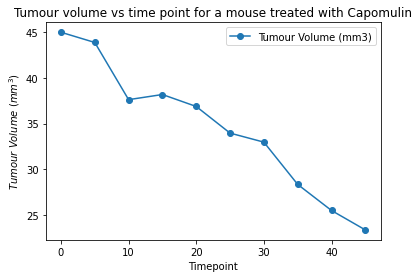

In [16]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin

  #select a random mouse treated with Capomulin
random_mouse_Capomulin=df2.loc[df2['Drug Regimen']=='Capomulin'].sample(n=1)['Mouse ID']
r = random_mouse_Capomulin.astype('string').values[0]
df_for_line_plot=df2.loc[df2['Mouse ID'] == r,:]
plot1=df_for_line_plot.plot(x="Timepoint",y="Tumour Volume (mm3)", marker='o',
                      title="Tumour volume vs time point for a mouse treated with Capomulin")
plot1.set_ylabel(r'$Tumour~Volume~(mm^3)$')
plt.savefig("./figures/Line plot of tumour volume vs time point_mouse_Capomulin.png")
plt.show()

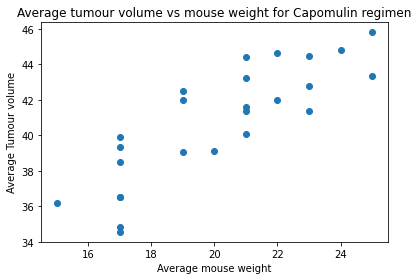

In [17]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen
df_Capomulin=df2.loc[df2['Drug Regimen']=='Capomulin',['Mouse ID','Weight (g)','Tumour Volume (mm3)']]

df_average_Capomulin_4plot=df_Capomulin.groupby('Mouse ID').mean()

plt.scatter(df_average_Capomulin_4plot['Weight (g)'],df_average_Capomulin_4plot['Tumour Volume (mm3)'])
plt.title("Average tumour volume vs mouse weight for Capomulin regimen")
plt.xlabel("Average mouse weight")
plt.ylabel("Average Tumour volume")
plt.tight_layout()
plt.savefig("./figures/TumourVol vs Mouse weight for Capomulin.png")
plt.show()

## Correlation and Regression

Correlation coefficient for mouse weight and average tumour volume for Capomulin regime is 0.8419363424694717


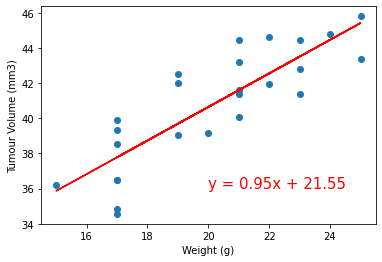

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen
from scipy.stats import linregress

mouse_weight=df_average_Capomulin_4plot['Weight (g)']
tumour_vol=df_average_Capomulin_4plot['Tumour Volume (mm3)']

print(f"Correlation coefficient for mouse weight and average tumour volume for Capomulin regime is \
{st.pearsonr(mouse_weight,tumour_vol)[0]}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, tumour_vol)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight,tumour_vol)
plt.plot(mouse_weight,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumour Volume (mm3)')
plt.show()